# Sales Analysis

In [1]:
#Disclaimer: This project is done with the assistant of 'Solving real world data science tasks with Python Pandas!'
#youtube link: https://www.youtube.com/watch?v=eMOA1pPVUc4
#The data are created by author, not from real world data
#Some additional features and amendments are made by William Wong 
#This analysis will be further analyzed using tableau

Import Necessary Library

In [2]:
import pandas as pd
import os 

## Task 0: Merging 12 months of sales data into a single file

### Reading the data

In [3]:
files = [file for file in os.listdir(r'C:\Users\Plko\Jupyter_Notebook\Youtube\Solving real world data science tasks with Python Pandas!\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data')]
all_months_data = pd.DataFrame()

for file in files:
    sales_data=pd.read_csv('C:/Users/Plko/Jupyter_Notebook/Youtube/Solving real world data science tasks with Python Pandas!/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/'+ file)
    all_months_data = pd.concat([all_months_data,sales_data])
    
all_months_data.to_csv('all_months_data.csv', index=False)

#### Read in the merged dataframe

In [4]:
all_data = pd.read_csv(r"C:\Users\Plko\Jupyter_Notebook\Youtube\Solving real world data science tasks with Python Pandas!\Pandas-Data-Science-Tasks\all_months_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data Cleansing

#### Drop rows of NaN

In [5]:
# Detecting the NaN
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Dropping na
all_data = all_data.dropna(axis='rows', how='any')
# Checking whether NaN is in the DataFrame
all_data.isna().values.any() 

False

#### Finding 'Or' and delete it


In [7]:
# After deleting the NaN from the DF we now face the another issue where 'Or' is in the Order Date 
# ValueError: invalid literal for int() with base 10: 'Or'
# The Or existed because we have stored the column index for each csv and retreived the Order Date (Or)
all_data = all_data[all_data['Order Date'].str[0:2] !=  'Or']

## Q1: What is the best month for sales? How much was earned in that month?

### Task1.1 : Augment DataFrame with addition columns

#### Adding a month column

In [8]:
all_data['Month'] = all_data['Order Date'].str[0:2]
#we now can run this cell since the 'Or' is not cleansed and no more issues are in the columns 
#all_data['Months'] = all_data['Months'].astype('int'): 
#but I will check again in the next cell for safety before running it 

In [9]:
# Checking whether all values in the Months columns are not Or
all_data['Month'].values.any != 'Or'

True

### Transforming the Months column to int (Again!)

In [10]:
all_data['Month'] = all_data['Month'].astype('int')

### Task 1.2: Adding the Sales Columns for finding the month with the best sales

In [11]:
# As we have to do the multiplication, we want to check what the data types are. 
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

### Converting Data types 

In [12]:
# These also work
# all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('float')
# all_data['Price Each'] = all_data['Price Each'].astype('float')

# to_numeric is generally better if you want to adjust the data types
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## Answering the Question! (Finally!)

In [13]:
Sales_Month = all_data.groupby('Month').sum()['Sales']

In [14]:
Sales_Month

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

### Visualizing the results

In [15]:
import matplotlib.pyplot as plt

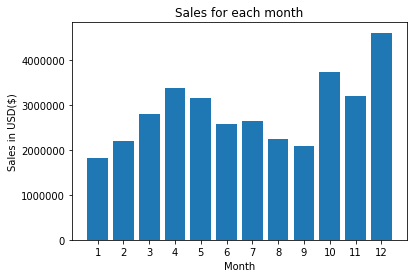

In [16]:
Month = Sales_Month.index.tolist()
plt.bar(Month, Sales_Month)
plt.xticks(Month)
plt.xlabel('Month')
plt.ylabel('Sales in USD($)')
plt.title('Sales for each month')
plt.show()

From the graph we can see that Dec is the best month for sale. Christmas could be one reason (and people have to spend less due to overspending during Christmas time!)

## Q2: Which city had the highest number of Sales

### Augmenting DF

In [17]:
def get_city (x):
    return x.split(',')[1]

def get_state_code (x):
    return x.split(',')[2].split(' ')[1]
all_data['City'] = all_data['Purchase Address'].apply(lambda x:f"{get_city(x)} ({get_state_code(x)})")
# same as:
#all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state_code(x) +')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


## Answering Q2!

In [18]:
# Grouping by the cities and Declaring necessary variables
sales_city= all_data.groupby('City').sum()["Sales"]
# Original solution from the video (list comprehension)
#city = [city for city, df in all_data.groupby('City')] 
# Improved version
city = sales_city.index.tolist()

In [19]:
type(sales_city)

pandas.core.series.Series

### Visualizing the DF

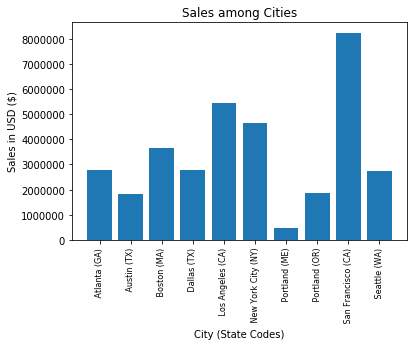

In [20]:
plt.bar(city , sales_city)
plt.xticks(city, rotation = 'vertical', size = 8)
plt.xlabel('City (State Codes)')
plt.ylabel('Sales in USD ($)')
plt.title('Sales among Cities')
plt.show()

## Q3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [21]:
# Retrieving necessary columns from all_data

In [22]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [23]:
#dt.hour is for a series, .hour is for a timestamp
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

In [24]:
# Original version from the video
#hour = [hour for hour , df in all_data.groupby('Hour')]
# Improved version 
hour = pd.DataFrame(all_data.groupby('Hour')['Hour']).index.tolist()

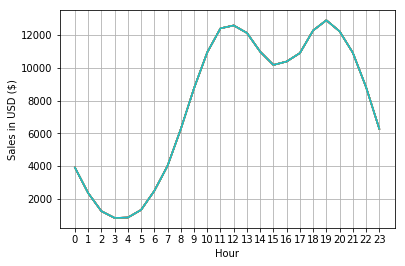

In [25]:
plt.plot(hour, all_data.groupby('Hour').count())
plt.grid()
plt.xticks(hour)
plt.xlabel('Hour')
plt.ylabel('Sales in USD ($)')
plt.show()
# Best hour for advertisement in a day is 11 a.m. and 7 p.m

## Q4: What products are offen sold together?

In [26]:
# max No. of product a customer purchased in one order
max(all_data.groupby('Order ID').count()['Product'])

5

In [27]:
# Finding the Orders that customers purchased more than 1 products
duplicated_order_id = all_data[all_data['Order ID'].duplicated(keep = False)]
duplicated_order_id['Grouped Product'] = duplicated_order_id.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
# dropping duplicates
duplicated_order_id = duplicated_order_id[['Order ID', 'Grouped Product']].drop_duplicates() 
duplicated_order_id.head()

C:\Users\Plko\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped Product
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [28]:
from collections import Counter 
from itertools import combinations

In [29]:
count = Counter()


for row in duplicated_order_id['Grouped Product']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
#    count.update(Counter(combinations(row_list, len(row_list)))) 
#could also be an asnwer if 3 or more elements in a list are considered 
count.most_common(10)


[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

## Q5: Which products are bestseller? Why do you think it did?

In [30]:
# This answer is based on the code used for Q4
#count_individual = Counter()

# Original Answer from the video 
#for row in duplicated_order_id['Grouped Product']:
#    row_list = row.split(',')
#    count_individual.update(Counter(row_list))
#count_individual

In [31]:
# This is the proper way to answer this Q
product_sold = all_data.groupby('Product').sum()['Quantity Ordered']
#product_sold
# Original solution 
#product =[product for product, df in all_data.groupby('Product')]
# better solution for listing the x-labal:
product = product_sold.index.tolist()
product

['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

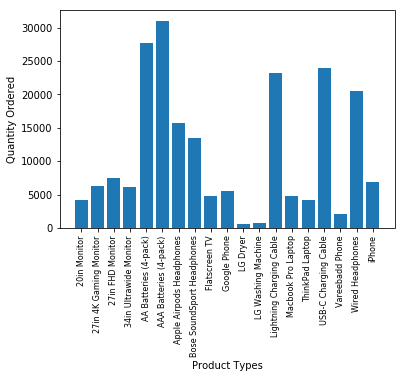

In [32]:
plt.bar(product, product_sold)
plt.xticks(product , rotation = 'vertical', size = 8)
plt.xlabel('Product Types')
plt.ylabel('Quantity Ordered')
plt.show()

In [33]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [34]:
price_product = all_data.groupby('Product').mean()['Price Each']
price_product

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

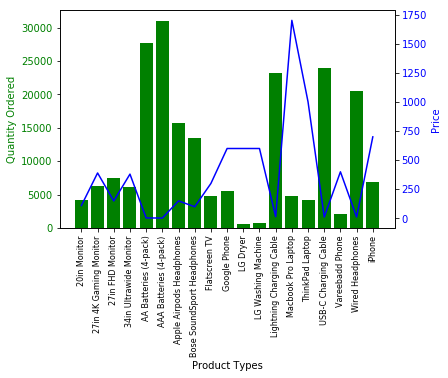

In [35]:

fig, ax1 = plt.subplots()

ax1.set_xlabel('Product Types')
ax1.set_ylabel('Quantity Ordered' , color = 'g')
ax1.set_xticklabels(product , rotation = 'vertical' , size = 8)
ax1.tick_params('y', labelcolor = 'g')
ax1.bar(product, product_sold , color = 'g')

ax2 = ax1.twinx()
ax2.set_ylabel('Price' , color = 'b')
ax2.tick_params('y', labelcolor = 'b')
ax2.plot(product, price_product, color = 'b')

plt.show()

In [36]:
all_data.columns.values

array(['Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour',
       'Minute'], dtype=object)

# Part 3: Data Staging

## Preparing data for Data Staging to mysql

Reordering the columns for better illustration

In [37]:
# Saving the copy of the amended dataframe
all_data_processed = all_data.copy()

In [38]:
all_data.columns.values

array(['Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour',
       'Minute'], dtype=object)

In [39]:
all_data_processed = all_data_processed.rename(columns = {'Sales':'Amount'})
columns_reordered = ['Order ID', 'Product', 'Quantity Ordered','Price Each', 'Amount',
       'Order Date', 'Month','Hour','Minute' ,'Purchase Address','City']

In [40]:
all_data_processed = all_data_processed[columns_reordered]

In [41]:
all_data_processed['City'] = all_data_processed['City'].str.lstrip()

In [42]:
all_data_processed['Purchase Address'] = all_data_processed['Purchase Address'].str.lstrip()

### Preparing query

In [43]:
# Query for integrating all_data_processed to the database
insert_query = 'INSERT INTO sales_data VALUES'
list_query = []
for row in range(all_data_processed.shape[0]):
    insert_query += '('
    row_df = all_data_processed.iloc[row]
    for col in range (all_data_processed.shape[1]):
        col_values = row_df[col]
        try:
            pd.to_numeric(col_values)
            insert_query += f"{col_values}, "
        except:
            insert_query += f"'{col_values}', "
    if row%20 == 0 and (row!= all_data_processed.shape[0]-1 and row!= 0):
        insert_query = insert_query[:-2] +")"
        list_query.append(insert_query)
        insert_query = 'INSERT INTO sales_data VALUES' 
    else:
        insert_query = insert_query[:-2] +"),"
insert_query = insert_query[:-2] +");"
list_query.append(insert_query)

In [44]:
def add_special_char():
    new_string = str(key)
    x=0
    while( x!=len(new_string)):
        if new_string[x] == "'":
            new_string = new_string[:x] + "'" + new_string[x:]
            x+=2
        x+=1
    return(new_string)


insert_query_duplicate_order_id_processed = 'INSERT INTO duplicate_order_id VALUES'
for key, value in count.most_common():
    key = add_special_char()
    insert_query_duplicate_order_id_processed += '('
    insert_query_duplicate_order_id_processed += f"'{str(key)}',{value}"
    insert_query_duplicate_order_id_processed += '),'
insert_query_duplicate_order_id_processed = insert_query_duplicate_order_id_processed[:-1] + ';'
print(insert_query_duplicate_order_id_processed)

INSERT INTO duplicate_order_id VALUES('(''iPhone'', ''Lightning Charging Cable'')',1005),('(''Google Phone'', ''USB-C Charging Cable'')',987),('(''iPhone'', ''Wired Headphones'')',447),('(''Google Phone'', ''Wired Headphones'')',414),('(''Vareebadd Phone'', ''USB-C Charging Cable'')',361),('(''iPhone'', ''Apple Airpods Headphones'')',360),('(''Google Phone'', ''Bose SoundSport Headphones'')',220),('(''USB-C Charging Cable'', ''Wired Headphones'')',160),('(''Vareebadd Phone'', ''Wired Headphones'')',143),('(''Lightning Charging Cable'', ''Wired Headphones'')',92),('(''Lightning Charging Cable'', ''Apple Airpods Headphones'')',81),('(''Vareebadd Phone'', ''Bose SoundSport Headphones'')',80),('(''USB-C Charging Cable'', ''Bose SoundSport Headphones'')',77),('(''Apple Airpods Headphones'', ''Wired Headphones'')',69),('(''Lightning Charging Cable'', ''USB-C Charging Cable'')',58),('(''Lightning Charging Cable'', ''AA Batteries (4-pack)'')',55),('(''Lightning Charging Cable'', ''Lightning Ch

## Exporting the processed data to mysql

### Importing necessary library

In [45]:
import pymysql

In [46]:
import sys
sys.getsizeof(insert_query)

1371

In [47]:
conn = pymysql.connect(database = 'Sales_Analysis', user = 'root', password = '123123123', max_allowed_packet='24MB')
cursor = conn.cursor()

In [48]:
#checking whether it is sucessfully connected to the database
conn.open

True

In [49]:
# inserting all_data_processed to the database
for x in range(len(list_query)):
    cursor.execute(list_query[x])

In [50]:
# inserting duplicate_order_id_processed to the database
cursor.execute(insert_query_duplicate_order_id_processed)

313

In [51]:
conn.commit()
conn.close()

In [52]:
#checking whether the number of rows in database matches the rows in df
len(all_data_processed)

185950

## Save as csv file and further analyze in Tableau

In [53]:
all_data_processed.to_csv('Sales_data_preprocessed.csv')